# SETTING ENVIRONMENT


In [34]:
"""# mount the colab with google drive
from google.colab import drive
drive.mount('/content/drive')"""

"# mount the colab with google drive\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [35]:
# set folder tempat kerja (current working directory)
import os
cwd = '/Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita'
# cwd = '/content/drive/MyDrive/Monitoring Berita'

os.chdir(cwd)

# INPUT PARAMETER PENCARIAN

In [36]:
# AI Model (deepseek/openai)
model_name          = "deepseek"
# Model version (openai only: gpt-3.5-turbo/gpt-4o-mini/gpt-5-nano/gpt-5-mini/gpt-5)
model_version       = "gpt-5-nano"
# Tanggal awal pencarian berita [YYYY-MM-DD]
start_date          = "2025-10-01"
# Tanggal akhir pencarian berita
end_date            = "2025-10-02"
# Keywords pencarian berita
keywords_pencarian  = ["purbaya", "menkeu", "kilang"]
# Keywords analisis topic
keywords_topic      = ["rokok ilegal", "makan bergizi gratis", "tax amnesty", "sidak BNI", 'lainnya']
# Jumlah halaman pencarian
page_length         = 2

### Menyimpan Parameter Pencarian

In [37]:
# tandai waktu mulai proses
import time 
start_process_time = time.time()

In [38]:
from datetime import datetime, timedelta

# Konversi string ke datetime
start = datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.strptime(end_date, "%Y-%m-%d")

# Buat list tanggal dari end_date ke start_date (descending)
search_date = [(end - timedelta(days=i)).strftime("%Y-%m-%d")
               for i in range((end - start).days + 1)]

In [39]:
import json
from pathlib import Path

config_path = Path("config.json")

# Data baru yang ingin disimpan/diupdate
variabel = {
    "search_date": search_date,
    "keywords": keywords_pencarian,
    "topic_keywords":keywords_topic,
    "max_page_length": page_length,
    "AI_name": model_name,
    "model_version": model_version
}

# Baca isi config.json lama (jika ada)
if config_path.exists():
    try:
        with open(config_path, "r", encoding="utf-8") as f:
            config = json.load(f)
    except Exception as e:
        print(f"Gagal membaca config.json: {e}")
        config = {}
else:
    config = {}

# Update hanya key yang ada di `variabel`
config.update(variabel)

# Simpan kembali ke file
with open(config_path, "w", encoding="utf-8") as f:
    json.dump(config, f, indent=4, ensure_ascii=False)

print(f"Config.json berhasil diperbarui: {config_path}")


Config.json berhasil diperbarui: config.json


# LANGKAH ANALISIS

## SCRAP DATA BERITA DI MEDIA ONLINE

### Google News

In [40]:
file_loc = os.path.join(cwd, 'tarik_daftar_berita', 'list_googlenews.ipynb')

%run "$file_loc"

[INFO] Mulai scrape Google News RSS | queries=3 | max_items_per_query=200 | date_filters=['2025-10-02', '2025-10-01']
[INFO] [QUERY] purbaya => https://news.google.com/rss/search?q=purbaya+when%3A7d&hl=id&gl=ID&ceid=ID:id
[INFO] [QUERY] menkeu => https://news.google.com/rss/search?q=menkeu+when%3A7d&hl=id&gl=ID&ceid=ID:id
[INFO] [QUERY] kilang => https://news.google.com/rss/search?q=kilang+when%3A7d&hl=id&gl=ID&ceid=ID:id


Decoded URL: https://www.cnbcindonesia.com/news/20251001132902-4-671902/angkat-jempol-purbaya-makan-di-warung-kaki-lima-usai-rapat-danantara
Decoded URL: https://finance.detik.com/berita-ekonomi-bisnis/d-8138312/purbaya-ancam-ganti-dirjen-jika-masalah-kompensasi-tak-kelar-sebulan
Decoded URL: https://news.ddtc.co.id/berita/nasional/1814109/dikritik-karena-tak-naikkan-tarif-cukai-rokok-begini-respons-purbaya
Decoded URL: https://www.cnbcindonesia.com/news/20251001133616-4-671903/purbaya-makan-di-warung-kaki-lima-usai-rapat-danantara-intip-menunya
Decoded URL: https://www.cnbcindonesia.com/news/20251001082323-4-671744/beda-jauh-purbaya-bocorkan-harga-asli-bbm-solar-bukan-rp6800-liter
Decoded URL: https://finance.detik.com/energi/d-8138295/purbaya-ungkap-harga-asli-lpg-3-kg-hingga-pertalite
Decoded URL: https://www.cnbcindonesia.com/news/20251001080550-4-671743/purbaya-ungkap-harga-asli-bbm-pertalite-ternyata-bukan-rp10000-liter
Decoded URL: https://www.cnbcindonesia.com/news/202510011128

[INFO] Selesai. Tersimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/daftar_berita/google_news_rss.xlsx (181 baris)


Decoded URL: https://www.inilah.com/rampungkan-kunci-pendukung-kilang-rdmp-balikpapan-siap-uji-operasi-rfcc


## MENGGABUNGKAN DATA

### Konsolidasi Data Url Berita

In [41]:
file_loc = os.path.join(cwd, '01_konsolidasi_data_berita.ipynb')

%run "$file_loc"

Membaca Excel:   0%|          | 0/1 [00:00<?, ?file/s]

[INFO] Duplikat dihapus: 19 baris | Total akhir: 162
[INFO] Selesai gabung. Total baris: 162 | File terbaca: 1
[INFO] Normalisasi selesai. Total baris: 162 | Berhasil: 162 | Gagal: 0
[INFO] Filter judul < 40 chars: dihapus 0 baris | sisa: 162
[INFO] Config berhasil diperbarui: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/config.json


File berhasil disimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/konsolidasi_berita/hasil_gabungan_20251002_100935.csv


## BACA BERITA

### Membaca Data Url Berita

In [42]:
file_loc = os.path.join(cwd, '02_baca_link_berita.ipynb')

%run "$file_loc"

[INFO] Total URL untuk diproses: 162 (limit=None)


Scraping artikel:   0%|          | 0/162 [00:00<?, ?it/s]

[WARNING] Attempt 1 failed for https://ekonomi.espos.id/properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001: HTTPSConnectionPool(host='ekonomi.espos.id', port=443): Max retries exceeded with url: /properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1000)')))
[WARNING] Attempt 2 failed for https://ekonomi.espos.id/properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001: HTTPSConnectionPool(host='ekonomi.espos.id', port=443): Max retries exceeded with url: /properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1000)')))
[ERROR] Failed to fetch https://ekonomi.espos.id/properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001: HTTPSConnectionPool

## LABELLING ISU


In [43]:
file_loc = os.path.join(cwd, '03_labelling_awal.ipynb')

%run "$file_loc"

Normalisasi tanggal_berita: total=162, sukses=162, gagal=0 (0.0%)
Filter tanggal: 2025-10-01 s.d 2025-10-02 (dari 162 -> 162)
Labeling selesai. Jumlah baris: 162


,kategori_isu,jumlah
0,Isu Kemenkeu,98
1,Isu Nasional,45
2,Isu Lainnya,19


Tersimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/hasil_labeling/hasil_labeling_20251002_101322.csv & /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/hasil_labeling/hasil_labeling_20251002_101322.xlsx
Berhasil update config.json di /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/config.json


## ANALISIS DENGAN GEN AI

### Analisis Berita Kemenkeu, Internasional, dan Nasional

In [44]:
file_loc = os.path.join(cwd, '04_analisis_dengan_genAI.ipynb')

%run "$file_loc"

API keys - Deepseek: OK | OpenAI: OK
Provider yang dipakai: deepseek


Analisis berita (parallel deepseek):   0%|          | 0/143 [00:00<?, ?berita/s]

[INFO] Berhasil update config.json di config.json


Pipeline selesai. Hasil disimpan di 00_hasil_analisis/seluruh_berita/analisis_ai_20251002_deepseek_default.csv
Monitoring sementara: {'execution_datetime': '2025-10-02 10:17:17', 'provider': 'deepseek', 'model_name': 'deepseek-chat', 'elapsed_seconds': 235.47, 'output_file': '00_hasil_analisis/seluruh_berita/analisis_ai_20251002_deepseek_default.csv', 'n_rows_result_df': 143}
Monitoring log ditulis/ditambahkan ke monitoring_log_genai.csv
    execution_datetime  provider     model_name  elapsed_seconds  \
0  2025-10-02 10:17:17  deepseek  deepseek-chat           235.47   

                                                                  output_file  \
0  00_hasil_analisis/seluruh_berita/analisis_ai_20251002_deepseek_default.csv   

   n_rows_in_memory  n_rows_output_file  
0               143                 143  


### Analisis Berita Penting

In [48]:
file_loc = os.path.join(cwd, '05_analisis_berita_penting copy.ipynb')

%run "$file_loc"

[INFO] ✅ AI Configuration loaded: DEEPSEEK
[INFO]    Model: deepseek-chat
[INFO]    Temperature: 0.1
[INFO]    Max Tokens: 5000


=== KONFIGURASI AI MODEL ===


[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] ✅ DEEPSEEK API connection successful
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


🎯 AI Model: DEEPSEEK (deepseek-chat)
🔧 Temperature: 0.1
📝 Max Tokens: 5000
🔑 API Key: ********************...8d74

🧪 Testing AI connection...


[INFO] Membaca file analisis AI: 00_hasil_analisis/seluruh_berita/analisis_ai_20251002_deepseek_default.csv
[INFO] Total berita: 143
[INFO] Berita penting (filtered): 84


✅ Test Response: AI Ready!

✅ AI configuration completed successfully!
💡 Gunakan CALL_AI_MODEL(prompt) untuk memanggil AI di sel lain.

📋 Environment Variables yang diset:
   MODEL_ANALISIS = deepseek
   AI_MODEL_NAME = deepseek-chat
   DUMMY_MODE = 0
Berhasil memuat 84 berita penting

Sample berita penting:
                                                                                                           judul_berita  \
141  Respon Permintaan Menkeu Bangun Kilang Minyak Baru, Bahlil : 17 Kilang Studi Kelayakannya Hampir Final - Pasardana   
81             Menkeu Purbaya Tagih Janji Pertamina Bangun 7 Kilang Dalam 5 Tahun: Saya Bukan Juru Bayar - Liputan6.com   
79                               Menkeu Purbaya Blak-blakan usai Diadukan BUMN: Saya Bukan Juru Bayar Saja! - Kompas.tv   
36                                                       Bangun Kilang Baru Memang Sesulit Itu, Pak Purbaya! - Tirto.id   
37                                          Podcast: Tentang Purbaya dan Ga

  0%|          | 0/84 [00:00<?, ?it/s][INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
 12%|█▏        | 10/84 [00:36<04:53,  3.97s/it][INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
 87%|████████▋ | 73/84 [03:40<00:34,  3.15s/it][INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
100%|██████████| 84/84 [04:10<00:00,  2.98s/it]
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


Analysis complete: 84 articles in 250.3s
Success: 84, Errors: 0
AI Provider: DEEPSEEK

Sample results (showing 3):
1. Respon Permintaan Menkeu Bangun Kilang Minyak Baru, Bahlil :...
   Resume: Menteri Keuangan meminta Pertamina segera bangun kilang minyak baru un...
   Dampak: Positif
2. Menkeu Purbaya Tagih Janji Pertamina Bangun 7 Kilang Dalam 5...
   Resume: Menteri Keuangan Purbaya Yudhi Sadewa menagih janji Pertamina untuk me...
   Dampak: Positif
3. Menkeu Purbaya Blak-blakan usai Diadukan BUMN: Saya Bukan Ju...
   Resume: Menteri Keuangan Purbaya Yudhi Sadewa menanggapi aduan BUMN ke DPR den...
   Dampak: Positif

File saved: 00_hasil_analisis/berita_penting/analisis_berita_penting_deepseek_20251002_105430.csv
🔍 Debug path info:
   Current CWD: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita
   File path: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/

[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"



✅ News Update disimpan di: 00_laporan_cetak/news_update_general_20251002_105440.txt
📄 Total baris: 67

📋 Preview News Update:
------------------------------------------------------------
News Update
Menkeu Sidak BNI
Jakarta, Kamis, 2 Oktober 2025 (Pukul 10.00 WIB)

Pemberitaan terkait menkeu sidak bni hari ini tercatat terdapat 84 berita (39 positif, 31 netral, 14 negatif) di media online.

Sorotan Media Online
• Menkeu tagih janji Pertamina bangun 7 kilang baru untuk tekan impor BBM dan kurangi subsidi energi.
• Pemerintah percepat 17 kilang modular untuk hilirisasi energi, studi kelayakan hampir final.
• Impor BBM meningkat dari USD 20,7 miliar (2018) menjadi USD 25,92 miliar (2024), membebani APBN.
• Menkeu ancam potong anggaran atau ganti direksi BUMN jika proyek strategis tidak berjalan.
• Kebijakan cukai rokok 2026 tidak naik untuk lindungi industri dan cegah dominasi rokok ilegal.
• Menkeu lunasi tunggakan kompensasi energi Rp55 triliun ke BUMN dan percepat proses pembayaran.
•

[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"



✅ Laporan Analisis Media disimpan di: 00_laporan_cetak/laporan_analisis_media_20251002_105502.txt
📄 Total baris: 63

📋 Preview Laporan Analisis Media:
----------------------------------------------------------------------
===== Page 1 =====

**Laporan Analisis Media Online dan Media Sosial**
Kamis, 2 Oktober 2025

**EXECUTIVE SUMMARY**
Periode pemantauan media online menunjukkan 84 berita penting yang berhasil dianalisis.
Dari jumlah tersebut, 8 berita sesuai dengan topik yang dipantau: rokok ilegal, sidak BNI.
Fokus pemerintah terutama pada transparansi dan pengawasan sektor keuangan.
Pernyataan dan kebijakan penting dari pejabat terkait terus dipantau secara intensif.

**MEDIA ONLINE**

**Topik Berita:** rokok ilegal, sidak BNI
**Tonasi Berita:** positif

**Pesan Kunci dan Analisis:**

**ISU KEMENKEU**
...
[43 baris lainnya]
----------------------------------------------------------------------

🎯 Selesai! File tersedia di: 00_laporan_cetak/
=== DEMO FUNGSI HELPER CONFIG PATH ===
✅ 

# Visualisasi Data

✅ Konfigurasi berhasil dimuat dari config.json
   ✅ File berita penting tersedia
✅ Data berita penting berhasil dimuat!

✅ Data siap untuk divisualisasikan!
🔄 Memulai preprocessing data untuk visualisasi...
📅 Konversi format tanggal...
   ✅ Konversi tanggal berhasil
🧹 Cleaning teks untuk word cloud...
   ✅ Text cleaning berhasil
📊 Grouping data untuk analisis...
   ✅ Grouping data berhasil
📈 Perhitungan statistik...
   ✅ Statistik berhasil dihitung
✅ Preprocessing selesai!

📋 Ringkasan Data Processed:
   • Total artikel: 84
   • Rentang tanggal: 2 hari
   • Rata-rata artikel/hari: 42.0
   • Jumlah media: 43
   • Kata unik untuk word cloud: 130

🎯 Data siap untuk visualisasi!
   📊 Sentiment distribution: 3 kategori
   📅 Timeline data: 6 data points
   🏷️ Topic data: 2 topik
   🌐 Media sources: 10 media
✅ Fungsi-fungsi visualisasi telah didefinisikan!
🚀 Memulai pembuatan semua visualisasi...
📊 Dataset Overview:
   • Periode: 2025-10-01 - 2025-10-02
   • Total berita: 84 artikel
   • Rata


📈 2. Line Chart - Timeline Sentimen Harian



📋 3. Stacked Bar Chart - Ringkasan Harian



🌐 4. Bar Chart - Top Media Sources



🔥 5. Heatmap - Sentimen per Media per Tanggal



☁️ 6. Word Cloud - Kata Kunci Populer


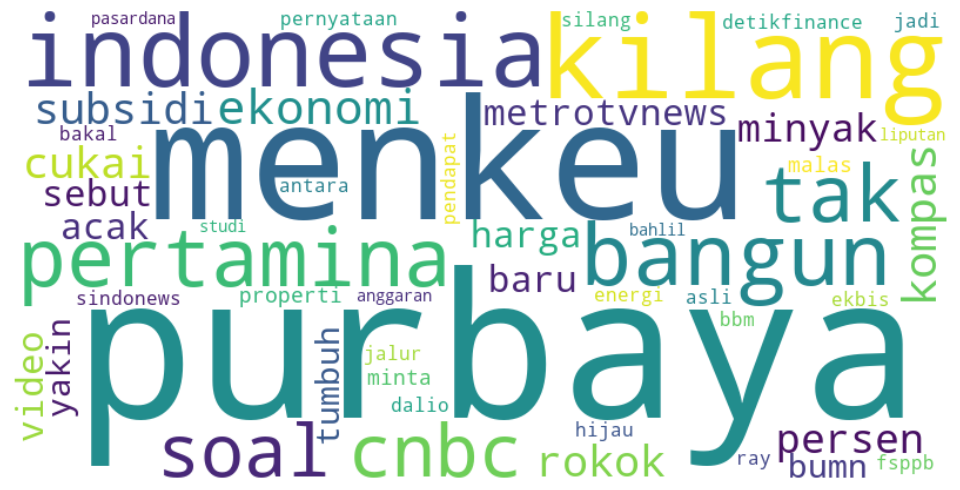


✅ Semua visualisasi telah ditampilkan!

📋 Insight Utama:
   🎯 Sentimen dominan: positif (46.4%)
   📺 Media terbanyak: www.cnbcindonesia.com (12 berita)
   🔤 Kata populer: purbaya (67), menkeu (44), kilang (27), indonesia (20), bangun (16)

✅ Semua visualisasi berhasil dibuat dan ditampilkan!
💡 Tip: Scroll ke atas untuk melihat grafik-grafik yang telah dibuat.
📋 DASHBOARD SUMMARY - MONITORING BERITA PENTING
📅 PERIODE ANALISIS
   • Tanggal: 01 October 2025 - 02 October 2025
   • Durasi: 2 hari
   • Total berita: 84 artikel
   • Rata-rata harian: 42.0 artikel/hari

😊 ANALISIS SENTIMEN
   😊 Positif: 39 berita (46.4%)
   😐 Netral: 31 berita (36.9%)
   😠 Negatif: 14 berita (16.7%)

🌐 TOP MEDIA SOURCES
   1. www.cnbcindonesia.com: 12 berita (14.3%)
   2. www.metrotvnews.com: 6 berita (7.1%)
   3. www.kompas.tv: 5 berita (6.0%)
   4. finance.detik.com: 4 berita (4.8%)
   5. ekbis.sindonews.com: 4 berita (4.8%)

🔤 TOP KEYWORDS
   1. 'purbaya': 67 kali muncul
   2. 'menkeu': 44 kali muncul
   3

In [49]:
file_loc = os.path.join(cwd, '06_visualisasi.ipynb')

%run "$file_loc"

# REKAP

In [47]:
# Tandai waktu selesai proses
end_process_time = time.time()
elapsed_time = end_process_time - start_process_time
# jadikan menit & detik
elapsed_minutes = int(elapsed_time // 60)
elapsed_seconds = int(elapsed_time % 60)
print(f"Waktu proses: {elapsed_minutes} menit {elapsed_seconds} detik")

Waktu proses: 18 menit 47 detik
